# Import the Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

# Read the Data 

In [2]:
agri_data = pd.read_excel('dataset/new_data.xlsx')

In [3]:
agri_data.head(10)

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice,102.0,321.00,3.147059
1,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana,176.0,641.00,3.642045
2,Andaman and Nicobar Islands,NICOBARS,Whole Year,Coconut,18168.0,65100000.00,3583.223250
3,Andaman and Nicobar Islands,NICOBARS,Whole Year,Sugarcane,1.0,2.00,2.000000
4,Andaman and Nicobar Islands,NICOBARS,Whole Year,Sweet potato,5.0,15.00,3.000000
5,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice,83.0,300.00,3.614458
6,Andaman and Nicobar Islands,NICOBARS,Whole Year,Coconut,18190.0,64430000.00,3542.056075
7,Andaman and Nicobar Islands,NICOBARS,Whole Year,Sugarcane,1.0,1.00,1.000000
8,Andaman and Nicobar Islands,NICOBARS,Whole Year,Sweet potato,11.0,33.00,3.000000
9,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice,189.2,510.84,2.700000


# Data Preprocessing

In [4]:
agri_data.isna().sum()

State_Name        0
District_Name     0
Season            0
Crop              0
Area              0
Production        0
yeild per area    0
dtype: int64

In [5]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74638 entries, 0 to 74637
Data columns (total 7 columns):
State_Name        74638 non-null object
District_Name     74638 non-null object
Season            74638 non-null object
Crop              74638 non-null object
Area              74638 non-null float64
Production        74638 non-null float64
yeild per area    74638 non-null float64
dtypes: float64(3), object(4)
memory usage: 2.8+ MB


In [6]:
agri_data.Season.unique()

array(['Kharif     ', 'Whole Year ', 'Autumn     ', 'Rabi       ',
       'Summer     ', 'Winter     '], dtype=object)

In [7]:
agri_data['Season'].replace('Kharif     ',1,inplace=True)
agri_data['Season'].replace('Whole Year ',2,inplace=True)
agri_data['Season'].replace('Autumn     ',3,inplace=True)
agri_data['Season'].replace('Summer     ',5,inplace=True)
agri_data['Season'].replace('Winter     ',6,inplace=True)
agri_data['Season'].replace('Rabi       ',4,inplace=True)

In [8]:
l = agri_data.Crop.unique()

In [9]:
l.sort()

In [10]:
print(l)

['Banana' 'Bean' 'Black pepper' 'Bottle Gourd' 'Brinjal' 'Cabbage'
 'Carrot' 'Cashewnut' 'Cauliflower' 'Coconut ' 'Cotton(lint)'
 'Dry chillies' 'Ginger' 'Groundnut' 'Jack Fruit' 'Lemon' 'Mango' 'Onion'
 'Paddy' 'Papaya' 'Pome Granet' 'Potato' 'Ragi' 'Rice' 'Sapota' 'Soyabean'
 'Sugarcane' 'Sunflower' 'Sweet potato' 'Tea' 'Tomato' 'Turmeric' 'Wheat']


In [11]:
m = 1

for i in l:
    agri_data['Crop'].replace(i,m,inplace=True)
    print(i,"----------",m)
    m+=1

Banana ---------- 1
Bean ---------- 2
Black pepper ---------- 3
Bottle Gourd ---------- 4
Brinjal ---------- 5
Cabbage ---------- 6
Carrot ---------- 7
Cashewnut ---------- 8
Cauliflower ---------- 9
Coconut  ---------- 10
Cotton(lint) ---------- 11
Dry chillies ---------- 12
Ginger ---------- 13
Groundnut ---------- 14
Jack Fruit ---------- 15
Lemon ---------- 16
Mango ---------- 17
Onion ---------- 18
Paddy ---------- 19
Papaya ---------- 20
Pome Granet ---------- 21
Potato ---------- 22
Ragi ---------- 23
Rice ---------- 24
Sapota ---------- 25
Soyabean ---------- 26
Sugarcane ---------- 27
Sunflower ---------- 28
Sweet potato ---------- 29
Tea ---------- 30
Tomato ---------- 31
Turmeric ---------- 32
Wheat ---------- 33


In [12]:
agri_data.Crop.unique()

array([24,  1, 10, 27, 29, 12, 32,  3,  8, 14, 11, 23, 18, 22,  5, 17, 20,
       31, 26, 33, 16, 21, 25,  6, 28, 13, 19, 30,  7,  9, 15,  4,  2],
      dtype=int64)

In [13]:
s = agri_data.State_Name.unique()

In [14]:
s.sort()

In [15]:
print(s)

['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']


In [16]:
m = 1

for i in s:
    agri_data['State_Name'].replace(i,m,inplace=True)
    print(i,"----------",m)
    m+=1

Andaman and Nicobar Islands ---------- 1
Andhra Pradesh ---------- 2
Arunachal Pradesh ---------- 3
Assam ---------- 4
Bihar ---------- 5
Chandigarh ---------- 6
Chhattisgarh ---------- 7
Dadra and Nagar Haveli ---------- 8
Goa ---------- 9
Gujarat ---------- 10
Haryana ---------- 11
Himachal Pradesh ---------- 12
Jammu and Kashmir  ---------- 13
Jharkhand ---------- 14
Karnataka ---------- 15
Kerala ---------- 16
Madhya Pradesh ---------- 17
Maharashtra ---------- 18
Manipur ---------- 19
Meghalaya ---------- 20
Mizoram ---------- 21
Nagaland ---------- 22
Odisha ---------- 23
Puducherry ---------- 24
Punjab ---------- 25
Rajasthan ---------- 26
Sikkim ---------- 27
Tamil Nadu ---------- 28
Telangana  ---------- 29
Tripura ---------- 30
Uttar Pradesh ---------- 31
Uttarakhand ---------- 32
West Bengal ---------- 33


In [17]:
agri_data.State_Name.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
      dtype=int64)

In [18]:
agri_data.head()

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area
0,1,NICOBARS,1,24,102.0,321.0,3.147059
1,1,NICOBARS,2,1,176.0,641.0,3.642045
2,1,NICOBARS,2,10,18168.0,65100000.0,3583.223250
3,1,NICOBARS,2,27,1.0,2.0,2.000000
4,1,NICOBARS,2,29,5.0,15.0,3.000000


In [ ]:
agri_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74638 entries, 0 to 74637
Data columns (total 7 columns):
State_Name        74638 non-null int64
District_Name     74638 non-null object
Season            74638 non-null int64
Crop              74638 non-null int64
Area              74638 non-null float64
Production        74638 non-null float64
yeild per area    74638 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 3.7+ MB


In [ ]:
agri_data.to_excel('dataset\cleandata.xlsx')

# Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
x = agri_data.iloc[:, [0,2,3,6]].values

In [ ]:
x

array([[1.00000000e+00, 1.00000000e+00, 2.40000000e+01, 3.14705882e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+00, 3.64204545e+00],
       [1.00000000e+00, 2.00000000e+00, 1.00000000e+01, 3.58322325e+03],
       ...,
       [3.30000000e+01, 5.00000000e+00, 2.40000000e+01, 2.61764706e+00],
       [3.30000000e+01, 2.00000000e+00, 2.70000000e+01, 5.01543210e+01],
       [3.30000000e+01, 6.00000000e+00, 2.40000000e+01, 2.14184796e+00]])

In [ ]:
model = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=1)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=1, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
predict=model.predict(x)

In [ ]:
agri_data['Label'] = pd.Series(predict, index=agri_data.index)

In [ ]:
agri_data.head()

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area,Label
0,1,NICOBARS,1,24,102.0,321.0,3.147059,0
1,1,NICOBARS,2,1,176.0,641.0,3.642045,0
2,1,NICOBARS,2,10,18168.0,65100000.0,3583.223250,4
3,1,NICOBARS,2,27,1.0,2.0,2.000000,0
4,1,NICOBARS,2,29,5.0,15.0,3.000000,0


In [ ]:
agri_data.Label.unique()

array([0, 4, 3, 1, 2], dtype=int64)

# Data Analysis

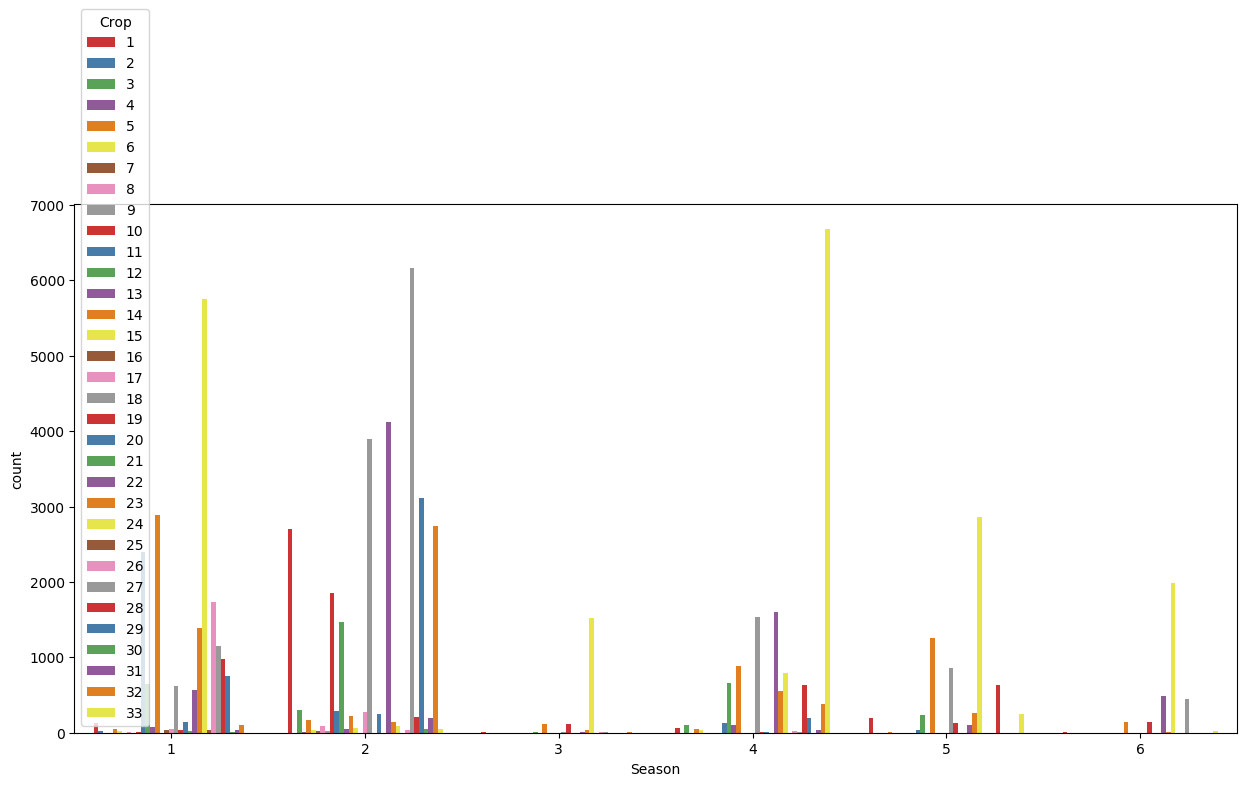

In [ ]:
plt.figure(figsize=(15,7), dpi=100)
sns.countplot(x='Season',hue='Crop',data=agri_data, palette='Set1')

In [ ]:
agri_data.groupby('Label').sum()

,State_Name,Season,Crop,Area,Production,yeild per area
Label,,,,,,
0,1355143,191887,1619250,1.545754e+09,9.918852e+09,9.798297e+05
1,828,122,627,4.296080e+05,8.437760e+09,1.205045e+06
2,350,28,378,7.900000e+01,5.613000e+06,1.027589e+06
3,4617,632,3158,2.432402e+06,2.735287e+10,3.538977e+06
4,5394,1014,5070,1.437045e+07,9.391213e+10,3.107065e+06


In [ ]:
a = 13551
b = 4617
c = 350
d = 5394
e = 828

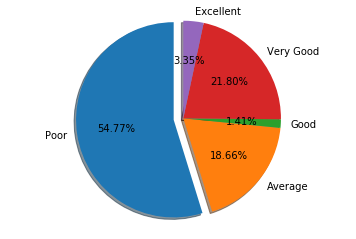

In [ ]:
clu = 'Poor', 'Average', 'Good', 'Very Good', 'Excellent'
count = [a, b, c, d, e]

ex = [0.1, 0, 0, 0, 0]

fig1, ax1 = plt.subplots()
ax1.pie(count, explode=ex, labels=clu, autopct='%1.2f%%', shadow=True, startangle=90)
#ax1.pie(marks, labels=student, autopct='%1.0f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

In [ ]:
agri_data.to_excel('dataset\cluster_data.xlsx')

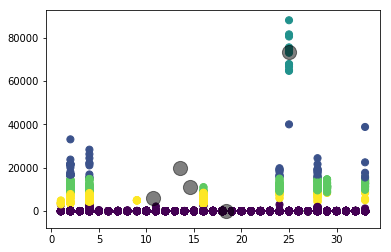

In [ ]:
plt.scatter(x[:, 0], x[:, 3], c=predict, s=50, cmap='viridis')

centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 3], c='black', s=200, alpha=0.5);

# Machine Learning Algorithums

In [ ]:
agri_data.head(20)

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area,Label
0,1,NICOBARS,1,24,102.00,321.00,3.147059,0
1,1,NICOBARS,2,1,176.00,641.00,3.642045,0
2,1,NICOBARS,2,10,18168.00,65100000.00,3583.223250,4
3,1,NICOBARS,2,27,1.00,2.00,2.000000,0
4,1,NICOBARS,2,29,5.00,15.00,3.000000,0
5,1,NICOBARS,1,24,83.00,300.00,3.614458,0
6,1,NICOBARS,2,10,18190.00,64430000.00,3542.056075,4
7,1,NICOBARS,2,27,1.00,1.00,1.000000,0
8,1,NICOBARS,2,29,11.00,33.00,3.000000,0
9,1,NICOBARS,1,24,189.20,510.84,2.700000,0


In [ ]:
agri_data['Label'].replace(0,'Poor',inplace=True)
agri_data['Label'].replace(1,'good',inplace=True)
agri_data['Label'].replace(2,'Excellent',inplace=True)
agri_data['Label'].replace(3,'Average',inplace=True)
agri_data['Label'].replace(4,'Very Good',inplace=True)

In [ ]:
agri_data.tail()

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area,Label
74633,33,PURULIA,4,22,477.0,9995.0,20.953878,Poor
74634,33,PURULIA,4,33,1622.0,3663.0,2.258323,Poor
74635,33,PURULIA,5,24,306.0,801.0,2.617647,Poor
74636,33,PURULIA,2,27,324.0,16250.0,50.154321,Poor
74637,33,PURULIA,6,24,279151.0,597899.0,2.141848,Poor


In [ ]:
agri_data.Label.unique()

array(['Poor', 'Very Good', 'Average', 'good', 'Excellent'], dtype=object)

In [ ]:
agri_data['Label'].replace('Poor',0,inplace=True)
agri_data['Label'].replace('Average',1,inplace=True)
agri_data['Label'].replace('good',2,inplace=True)
agri_data['Label'].replace('Excellent',3,inplace=True)
agri_data['Label'].replace('Very Good', 4,inplace=True)

In [ ]:
agri_data.head()

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area,Label
0,1,NICOBARS,1,24,102.0,321.0,3.147059,0
1,1,NICOBARS,2,1,176.0,641.0,3.642045,0
2,1,NICOBARS,2,10,18168.0,65100000.0,3583.223250,4
3,1,NICOBARS,2,27,1.0,2.0,2.000000,0
4,1,NICOBARS,2,29,5.0,15.0,3.000000,0


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = agri_data.drop(['Label','District_Name','Area','Production'], axis=1)
y = agri_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)
X_train.head(10)

,State_Name,Season,Crop,yeild per area
9598,4,2,29,3.383486
69193,31,5,1,43.500000
53472,28,1,28,1.626667
73205,33,2,27,106.990868
59392,29,2,32,4.543032
46703,23,6,27,64.250000
56195,28,2,1,44.452736
66996,31,5,18,11.642857
34482,17,1,24,2.347105
30925,16,2,32,2.278560


In [ ]:
X_test

,State_Name,Season,Crop,yeild per area
73037,33,2,10,9819.915254
57076,28,2,32,5.479452
56884,28,1,14,1.396060
19694,10,1,11,1.479885
13291,5,1,29,14.541667
17983,10,2,1,77.895522
66668,31,1,24,1.125720
4932,3,2,12,3.395349
25068,15,5,18,5.464286
56839,28,2,24,4.392137


In [ ]:
X_train.to_excel('Training_Testing/X_train.xlsx', index=False)
X_test.to_excel('Training_Testing/X_test.xlsx', index=False)
y_train.to_excel('Training_Testing/y_train.xlsx', index=False)
y_test.to_excel('Training_Testing/y_test.xlsx', index=False)

# Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(X_test)

[[ 1.45297168 -0.40031221 -1.46898197  6.68242877]
 [ 0.95888071 -0.40031221  1.26716116 -0.0868859 ]
 [ 0.95888071 -1.07056745 -0.9715014  -0.08970234]
 ...
 [ 1.25533529  0.94019826  0.02345974 -0.07201633]
 [-1.41275594 -1.07056745 -0.22528055 -0.07194136]
 [-0.81984677  1.61045349  0.27220002 -0.08859605]]


# Training the SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [ ]:
model_svm = SVC()

In [ ]:
model_svm.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
filename='model/svm_model.sav'
pickle.dump(model_svm,open(filename, 'wb'))

# Predictions and Evaluation

In [ ]:
predictions_svm = model_svm.predict(X_test)

In [ ]:
acc_svm = accuracy_score(y_true=y_test, y_pred= predictions_svm)
print("Overall accuracy of SVM model using test-set is : %f" %(acc_svm*100))

Overall accuracy of SVM model using test-set is : 100.000000


In [ ]:
print(classification_report(y_test,predictions_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14744
           1       1.00      1.00      1.00        66
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00       105

    accuracy                           1.00     14928
   macro avg       1.00      1.00      1.00     14928
weighted avg       1.00      1.00      1.00     14928



In [ ]:
print(confusion_matrix(y_test,predictions_svm))

[[14744     0     0     0     0]
 [    0    66     0     0     0]
 [    0     0     9     0     0]
 [    0     0     0     4     0]
 [    0     0     0     0   105]]


# Train the KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
filename='model/Knn_model.sav'
pickle.dump(classifier,open(filename, 'wb'))

# Evaluating the KNN

In [ ]:
acc_knn = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of KNN model using test-set is : %f" %(acc_knn*100))

Overall accuracy of KNN model using test-set is : 99.973205


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14744
           1       0.96      0.98      0.97        66
           2       1.00      1.00      1.00         9
           3       1.00      1.00      1.00         4
           4       0.99      0.97      0.98       105

    accuracy                           1.00     14928
   macro avg       0.99      0.99      0.99     14928
weighted avg       1.00      1.00      1.00     14928



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[14744     0     0     0     0]
 [    0    65     0     0     1]
 [    0     0     9     0     0]
 [    0     0     0     4     0]
 [    0     3     0     0   102]]


# Train the Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
filename='model/nb_model.sav'
pickle.dump(nb_model,open(filename, 'wb'))

# Evaluating the Naive bayes

In [ ]:
acc_nb = accuracy_score(y_true=y_test, y_pred= y_pred)
print("Overall accuracy of NB model using test-set is : %f" %(acc_nb*100))

Overall accuracy of NB model using test-set is : 98.305198


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     14744
           1       0.89      0.36      0.52        66
           2       0.43      0.67      0.52         9
           3       1.00      1.00      1.00         4
           4       0.30      1.00      0.46       105

    accuracy                           0.98     14928
   macro avg       0.72      0.80      0.70     14928
weighted avg       0.99      0.98      0.99     14928



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[14536     0     8     0   200]
 [    0    24     0     0    42]
 [    0     3     6     0     0]
 [    0     0     0     4     0]
 [    0     0     0     0   105]]


# Model Accuracy plot

In [ ]:
li_x = ['SVM', 'KNN', 'NB']
li_y = [acc_svm, acc_knn,acc_nb]

[1.0, 0.9997320471596999, 0.9830519828510182]


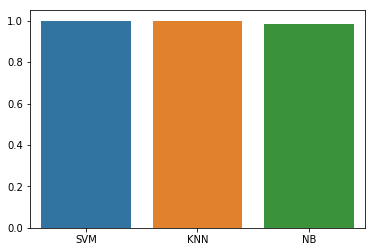

In [ ]:
print(li_y)
sns.barplot(x=li_x, y=li_y)

# Test

In [ ]:
label = {0:'Poor', 1:'Good', 2:'Average', 3:'Very Good', 4:'Exelent'}

In [ ]:
new = pd.read_excel('dataset/new_data.xlsx')

In [ ]:
new.head(2)

,State_Name,District_Name,Season,Crop,Area,Production,yeild per area
0,Andaman and Nicobar Islands,NICOBARS,Kharif,Rice,102.0,321.0,3.147059
1,Andaman and Nicobar Islands,NICOBARS,Whole Year,Banana,176.0,641.0,3.642045


In [ ]:
state = new.State_Name.unique()

In [ ]:
count = 1
for i in state:
    print(i,'---',count)
    count += 1

Andaman and Nicobar Islands --- 1
Andhra Pradesh --- 2
Arunachal Pradesh --- 3
Assam --- 4
Bihar --- 5
Chandigarh --- 6
Chhattisgarh --- 7
Dadra and Nagar Haveli --- 8
Goa --- 9
Gujarat --- 10
Haryana --- 11
Himachal Pradesh --- 12
Jammu and Kashmir  --- 13
Jharkhand --- 14
Karnataka --- 15
Kerala --- 16
Madhya Pradesh --- 17
Maharashtra --- 18
Manipur --- 19
Meghalaya --- 20
Mizoram --- 21
Nagaland --- 22
Odisha --- 23
Puducherry --- 24
Punjab --- 25
Rajasthan --- 26
Sikkim --- 27
Tamil Nadu --- 28
Telangana  --- 29
Tripura --- 30
Uttar Pradesh --- 31
Uttarakhand --- 32
West Bengal --- 33


In [ ]:
sea = new.Season.unique()

In [ ]:
count = 1
for i in sea:
    print(i,'---',count)
    count += 1

Kharif      --- 1
Whole Year  --- 2
Autumn      --- 3
Rabi        --- 4
Summer      --- 5
Winter      --- 6


In [ ]:
cro = new.Crop.unique()

In [ ]:
count = 1
for i in cro:
    print(i,'---',count)
    count += 1

Rice --- 1
Banana --- 2
Coconut  --- 3
Sugarcane --- 4
Sweet potato --- 5
Dry chillies --- 6
Turmeric --- 7
Black pepper --- 8
Cashewnut --- 9
Groundnut --- 10
Cotton(lint) --- 11
Ragi --- 12
Onion --- 13
Potato --- 14
Brinjal --- 15
Mango --- 16
Papaya --- 17
Tomato --- 18
Soyabean --- 19
Wheat --- 20
Lemon --- 21
Pome Granet --- 22
Sapota --- 23
Cabbage --- 24
Sunflower --- 25
Ginger --- 26
Paddy --- 27
Tea --- 28
Carrot --- 29
Cauliflower --- 30
Jack Fruit --- 31
Bottle Gourd --- 32
Bean --- 33


In [ ]:
state = int(input('Enter the State : '))
season = int(input('Enter the Season : '))
crop = int(input('Enter the Crop : '))
yeild = float(input('Enter the Expected Yeild'))

In [ ]:
l = [[state,season,crop,yeild]]

In [ ]:
import pickle
filename='model/nb_model.sav'

In [ ]:
model = pickle.load(open(filename,'rb'))

In [ ]:
y_pred = model.predict(l)

In [ ]:
y_pred

In [ ]:
a = int(y_pred)

In [ ]:
answer = label[a]

In [ ]:
print("Your going to get {}".format(answer))

# Thank You...